## what to do to create a Graph?

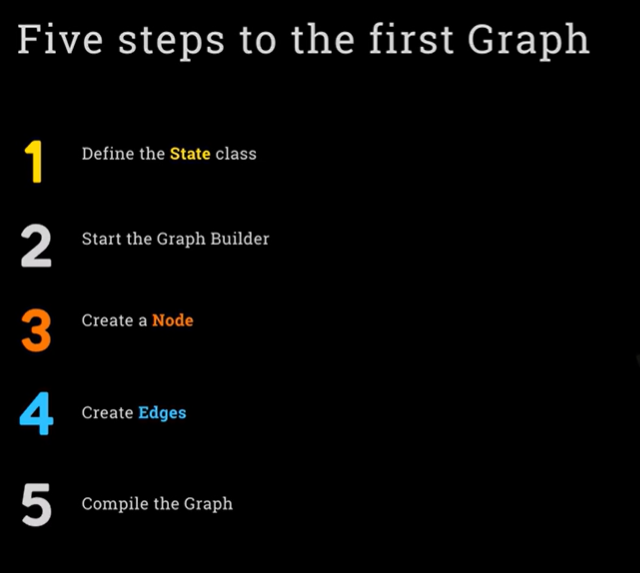

# 🧩 5 Steps to Create a Graph Using LangGraph

Based on the transcript, here are the **5 key steps to create a Graph using LangGraph** — the workflow system for building agentic applications.

---

## 🧠 Step 1: Define the State Class

The **state class** is:
- a data object
- the <u> current memory or context of your workflow — what the system knows at any given moment.</u> 
- It defines the variables your workflow can store and update as it executes.
- You don’t manually create a state object — LangGraph manages that automatically.

```python
class MyState(BaseModel):
    user_input: str
    response: str | None = None
```

#### different types of `state class`:


#### what happend to a state in a node:
- a node recieves the the old state object as input.
- does on operation and gets new attributes.
- create a new state object (it does not reuse or update the old state).
- return the new state
- your reducer function decides how to combine the new state and old state: it can append it to old state or it can overwrite the old state.

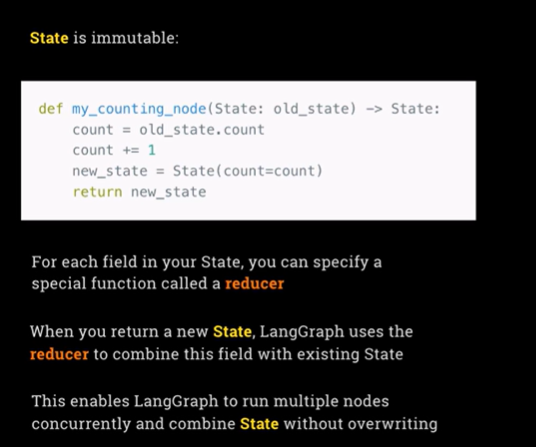

Q. What is **reducer** function?<br>
your reducer function (`add_messages`) decides how to combine the new state and old state: it can append it to old state or it can overwrite the old state.<br>
you can use builtin reducer functions or you can define custom reducer functions.


```python
from langgraph.graph.message import add_messages
```

---

## 🏗️ Step 2: Start the Graph Builder

Initialize a **graph builder**.  
This builder builds/defines your graph structure — nodes, edges, and their relationships.  
At this stage, **nothing is running yet**; you’re only defining the workflow.

```python
from langgraph import Graph

builder = Graph(state_schema=MyState)
```

---

## ⚙️ Step 3: Create Nodes

Define **nodes** — these are functions (or operations) that perform tasks like LLM calls, transformations, or API requests.

Each node takes the current state as input and outputs an updated state.

```python
def generate_response(state: MyState):
    state.response = llm(state.user_input)
    return state

builder.add_node("generate_response", generate_response)
```

---

## 🔗 Step 4: Create Edges

Define **edges** between nodes.  
Edges determine **execution order** and **conditional logic** — deciding what node runs next.

```python
builder.add_edge("start", "generate_response")
```

---

## 🚀 Step 5: Compile and Run the Graph

Once all nodes and edges are defined, **compile** the graph.  
This turns your static definition into an executable workflow.

Finally, **invoke** the graph with an initial state to start execution.

```python
graph = builder.compile()
result = graph.invoke({"user_input": "Hello!"})
print(result.response)
```

---

## 🧩 Summary Table

| Step | Description | Key Concept |
|------|--------------|-------------|
| 1 | Define your `State` class | Shared data schema |
| 2 | Start a `GraphBuilder` | Build workflow structure |
| 3 | Create Nodes | Define operations |
| 4 | Create Edges | Define flow / logic |
| 5 | Compile & Run | Execute workflow |

---

✅ **In short:**  
LangGraph workflows are built in two phases — first, you *define* your graph (nodes + edges), then you *run* it.  
This separation allows dynamic and modular agent systems.
